Co-occurance
1. 3 co-occurrence plots next to each other
    - [ ] Use default colouring
    - [ ] For maybe 5 sizes
    - [ ] Do 1 version without any clustering
    - [ ] Do 1 other version with clustering using 2000 runs
    - [ ] Use entire set, not only training data

In [1]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

sys.path.append("../")
import src.plot as myplot
import seaborn as sns


In [2]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/classifier/paper_plots/../src/plot.py'>

In [3]:
samples_path = '../OUTPUT/sample_sizes/'
fname = 'MCMs_'

In [8]:
# 2. For a sample size, compute the fraction of correct members in the group of each icc
# that is get the partition map and check fraction overlap between rows in where the 1s are excluding diagonal
nr_runs = 10
digit = 0

sample_sizes = [10, 1000 ,2000,3000, 5423]
coo_sum = np.empty((5,121,121),dtype=int)
n_samples = 20
for s, sample_size in enumerate(sample_sizes):
    # load runs
    mcm_sample = []
    mcms_path = os.path.join(samples_path, str(sample_size), "MCMs")
    for i in range(n_samples): #len(os.listdir(mcms_path))):
        with open(os.path.join(mcms_path, fname+str(i)+ ".json")) as f:
                mcm_sample.append(json.load(f))
    mcm_0_multisample = np.array([myplot.create_cooccurance_matrix(mcm_sample[i][digit]) for i in range(nr_runs)],dtype=int)
    coo_sum[s,:,:] = np.sum(mcm_0_multisample,axis=0)




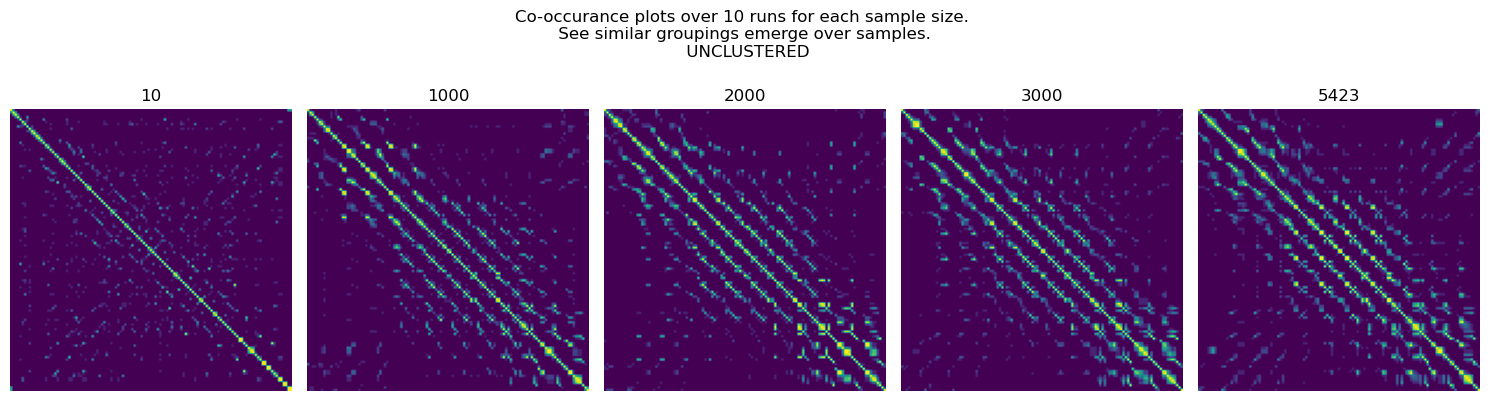

In [20]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

for i, ax in enumerate(axs):
    ax.imshow(coo_sum[i,:,:], cmap='viridis')
    ax.axis('off')
    ax.set_title(f'{sample_sizes[i]}')

plt.tight_layout()
plt.suptitle("Co-occurance plots over 10 runs for each sample size. \n See similar groupings emerge over samples. \n UNCLUSTERED")
plt.savefig("../figures/co-occurance_noclust2k.png", dpi=300, bbox_inches="tight")


In [10]:
coo_clust = np.empty(coo_sum.shape)
for i, coo in enumerate(coo_sum):
    coo_clust[i,:,:] = myplot.do_cluster(coo, coo_sum[2,:,:])

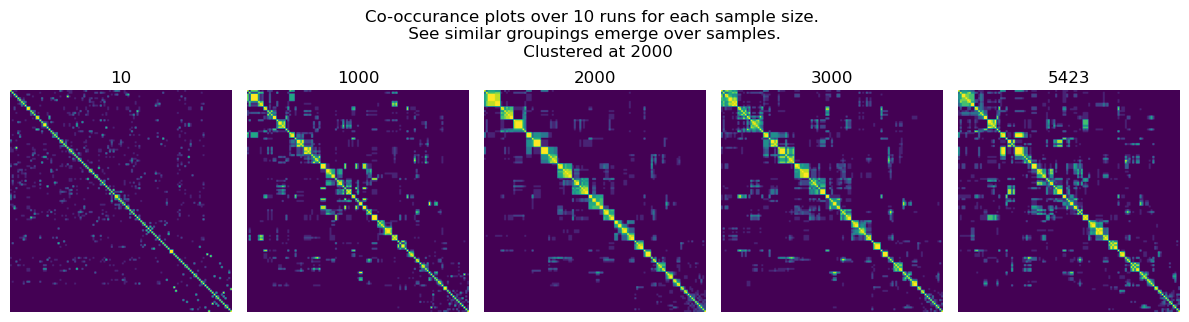

In [19]:
scale = 1
fig, axs = plt.subplots(1, 5, figsize=(12*scale, 4*scale))

for i, ax in enumerate(axs):
    ax.imshow(coo_clust[i,:,:], cmap='viridis')
    ax.axis('off')
    ax.set_title(f'{sample_sizes[i]}')

plt.tight_layout()
plt.suptitle("Co-occurance plots over 10 runs for each sample size. \n See similar groupings emerge over samples. \n Clustered at 2000")
plt.savefig("../figures/co-occurance_clust2k.png", dpi=300, bbox_inches="tight")


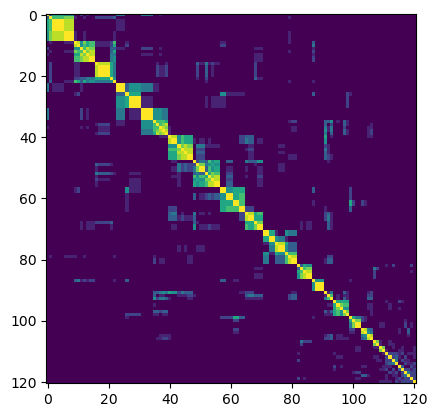

In [54]:
test = myplot.do_cluster(coo_sum[2,...],coo_sum[2,...])
plt.imshow(test)